In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Authentication for Twitter API

In [3]:
# Authentication
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [4]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = "UCM"
noOfTweet = 100

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search:  UCM
Please enter how many tweets to analyze:  100


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  23
negative number:  24
neutral number:  53


In [6]:
tweet_list[0:20]

,0
0,@Lucasvigo_ Normal. Ese comentario tuyo no se ...
1,"朝です！(*Ü*)ﾉ""☀"
2,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le..."
3,@MiguelGamboaMo1 por 2 razones capaz\n1- porqu...
4,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...
5,📢 VII Congreso Internacional – La actualidad d...
6,El UCM fase 5 🔝🔝🔝 https://t.co/XbsMVIJ12C
7,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...
8,RT @EticaEspacial: Este martes se hablará de #...
9,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...


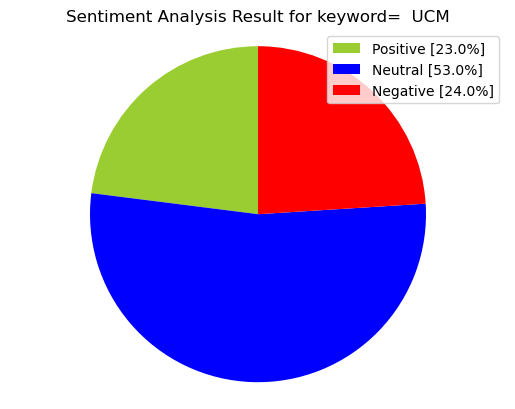

In [7]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [8]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [9]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,@Lucasvigo_ Normal. Ese comentario tuyo no se ...,@Lucasvigo_ Normal. Ese comentario tuyo no se ...
1,"朝です！(*Ü*)ﾉ""☀","朝です！(*Ü*)ﾉ""☀"
2,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...","RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le..."
3,@MiguelGamboaMo1 por 2 razones capaz\n1- porqu...,@MiguelGamboaMo1 por 2 razones capaz\n1- porqu...
4,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...
5,📢 VII Congreso Internacional – La actualidad d...,📢 VII Congreso Internacional – La actualidad d...
6,El UCM fase 5 🔝🔝🔝 https://t.co/XbsMVIJ12C,El UCM fase 5 🔝🔝🔝 https://t.co/XbsMVIJ12C
8,RT @EticaEspacial: Este martes se hablará de #...,RT @EticaEspacial: Este martes se hablará de #...
9,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...
10,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...


In [10]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@Lucasvigo_ Normal. Ese comentario tuyo no se ...,normal ese comentario tuyo no se a que vie...
1,"朝です！(*Ü*)ﾉ""☀",
2,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...",del 1 al 10 qu notan le ponen a guard...
3,@MiguelGamboaMo1 por 2 razones capaz\n1- porqu...,por 2 razones capaz 1 porque son unos hdp y...
4,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...,abro hilo 7 mitos sobre el vph xii concurs...
5,📢 VII Congreso Internacional – La actualidad d...,vii congreso internacional la actualidad d...
6,El UCM fase 5 🔝🔝🔝 https://t.co/XbsMVIJ12C,el ucm fase 5
8,RT @EticaEspacial: Este martes se hablará de #...,este martes se hablar de ticaespacial en l...
9,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...
10,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm


In [11]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

/tmp/ipykernel_21824/4219357815.py:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@Lucasvigo_ Normal. Ese comentario tuyo no se ...,normal ese comentario tuyo no se a que vie...,0.15,0.650000,negative,0.193,0.702,0.105,-0.2500
1,"朝です！(*Ü*)ﾉ""☀",,0.00,0.000000,neutral,0.000,0.000,0.000,0.0000
2,"RT @MarvelDato: 🍿 | ¿Del 1 al 10, qué notan le...",del 1 al 10 qu notan le ponen a guard...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
3,@MiguelGamboaMo1 por 2 razones capaz\n1- porqu...,por 2 razones capaz 1 porque son unos hdp y...,0.00,0.000000,negative,0.227,0.773,0.000,-0.5719
4,RT @guilleuu1: Abro hilo: 🦠7 MITOS SOBRE EL VP...,abro hilo 7 mitos sobre el vph xii concurs...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
5,📢 VII Congreso Internacional – La actualidad d...,vii congreso internacional la actualidad d...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
6,El UCM fase 5 🔝🔝🔝 https://t.co/XbsMVIJ12C,el ucm fase 5,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
8,RT @EticaEspacial: Este martes se hablará de #...,este martes se hablar de ticaespacial en l...,0.00,0.000000,neutral,0.000,1.000,0.000,0.0000
9,RT @GabyMeza8: ¡EN HONOR A STAR WARS! 🙌 Por el...,en honor a star wars por el maythe4thbew...,0.00,0.066667,negative,0.165,0.688,0.147,-0.1027
10,RT @MarvelLatin: Top 5 VILLANOS del UCM https:...,top 5 villanos del ucm,0.50,0.500000,positive,0.000,0.625,0.375,0.2023


In [12]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [13]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [14]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,27,62.79
negative,8,18.60
positive,8,18.60


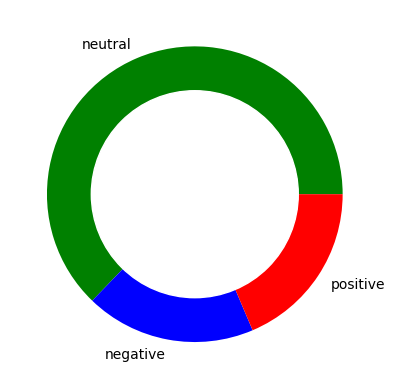

In [15]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



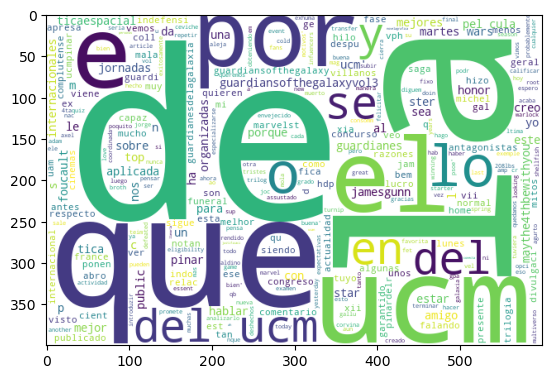

In [17]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

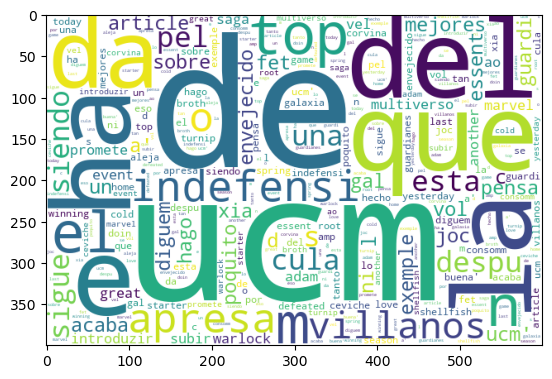

In [18]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

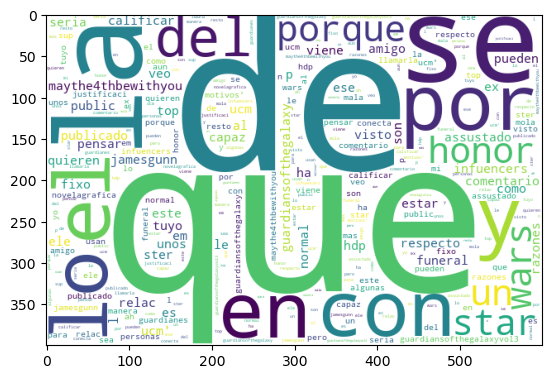

In [19]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

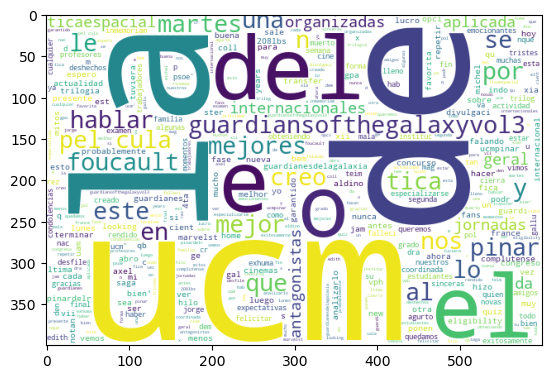

In [20]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)